# Parsing Practice

The purpose of this tutorial is to gain more insight into using parsers and grammars and to get familiarized with the tools provided to this end by NLTK. The source for this tutorial can be found [here](https://coling.epfl.ch/TP/TP-parsing.php) as part of a NLP course.

**Our goals are to:**

- Understand the process of parsing better by doing some examples by hand.
- Gain insight into grammars by writing a grammar of our own.
- Experiment with training a grammar from a corpus and evaluating it.

**The practical session is organized in four sections:**

- The warm-up, where you are going to use a given toy grammar to generate parse trees and get a chance to compare your intuition with the results provided by the NLTK parsers.
- Then, you will need to design and test your own grammar, again, for a small example.
- Next, you will automatically extract a grammar from a corpus of annotated sentences.
- Finally, you are going to explore ways to improve automatically extracted grammars, through error analysis.

Before diving in, it would be useful to have a look at how NLTK handles parsing. At the end of the Notebook, you will find a summary of the most useful commands. For more helpful explanations and examples, feel free to consult the [Chapter 8 of the NLTK Book](https://www.nltk.org/book/ch08.html), along with the chapter extras.


In [ ]:
mypath = "./img/"

# Exercise 0

Have a look at the texts and at the grammar below.

### Input texts:

    I saw an elephant
    I saw an elephant in my pajamas

### Grammar:                

    S   -> NP VP     [1.0]
    PP  -> P NP      [1.0]
    NP  -> Det N     [0.4]
    NP  -> Det N PP  [0.2]
    VP  -> V NP      [0.5]
    VP  -> VP PP     [0.5]

    NP  -> 'I'        [0.4]
    Det -> 'an'       [0.5]
    Det -> 'my'       [0.5]
    N   -> 'elephant' [0.5]
    N   -> 'pajamas'  [0.5]
    V   -> 'saw'      [1.0]
    P   -> 'in'       [1.0]



**1.-** Load the previous grammar by means of the `fromstring` method of the `PCFG` class.

In [ ]:
import nltk
from nltk.tree import *
from nltk.draw import tree

grammar = nltk.PCFG.fromstring("""
S -> NP VP 	[1.0]
PP -> P NP 	[1.0]
NP -> Det N 	[0.4]
NP -> Det N PP 	[0.2] 
NP -> 'I' 	[0.4]
VP -> V NP 	[0.5]
VP -> VP PP 	[0.5]
Det -> 'an' 	[0.5] 
Det -> 'my' 	[0.5]
N -> 'elephant' [0.5] 
N ->  'pajamas' [0.5]
V -> 'saw' 	[1.0]
P -> 'in' 	[1.0]
""")

In [ ]:
grammar

<Grammar with 13 productions>

**2.-** Using this grammar, try to parse the sample sentences with the NLTK `ChartParser` and then with the  NLTK `ViterbiParser`. The `ChartParser` does not care about probabilities; it just tries to find all the possible parses (trees) that fit the sentence. In contrast, `ViterbiParser` is a Dynamic Programming algorithm (very similar to the CKY algorithm that we explained in class) that tries to recursively find the best parse (tree) for the sentence, based on the probabilities defined by the grammar.

Import example sentences to NLTK and tokenize them:

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
str_sentence1 = "I saw an elephant"
str_sentence2 = "I saw an elephant in my pajamas"
 
print("Example sentences")
print(str_sentence1)
print(str_sentence2)
print('')

tokens1 = nltk.word_tokenize(str_sentence1)
tokens2 = nltk.word_tokenize(str_sentence2)
print("Tokenized example sentences")
print(tokens1)
print(tokens2)

Example sentences
I saw an elephant
I saw an elephant in my pajamas

Tokenized example sentences
['I', 'saw', 'an', 'elephant']
['I', 'saw', 'an', 'elephant', 'in', 'my', 'pajamas']


Create the Chart and Viterbi parsers, with the input grammar:

In [ ]:
chart_parser = nltk.ChartParser(grammar)
viterbi_parser = nltk.ViterbiParser(grammar)

**3.-** Examine the output of the parsers. Is there any difference?

**4.-** Using the NLTK GUI, draw the most probable parse trees found by the NLTK parsers and compare them. 

* How are they different?
* Do they differ only in the names of the nonterminals use, or is a structural difference as well?
* Why do you think these differences occur?

Results for the `ChartParser`:

In [ ]:
from IPython.display import Image

In [ ]:
print("Sentence:", str_sentence1)
for tree in chart_parser.parse(tokens1):
    print(tree)
    tree.draw() # To draw the parse with the NLTK GUI

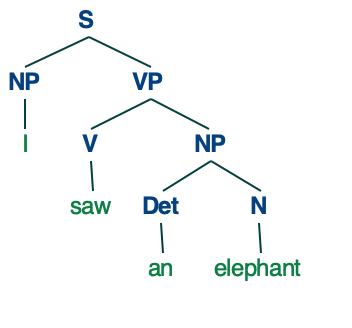

In [ ]:
Image(mypath + 'image1.png')

In [ ]:
print("Sentence:", str_sentence2)
for tree in chart_parser.parse(tokens2):
    print(tree)
    tree.draw() # To draw the parse with the NLTK GUI

Sentence: I saw an elephant in my pajamas
(S
  (NP I)
  (VP
    (VP (V saw) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V saw)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


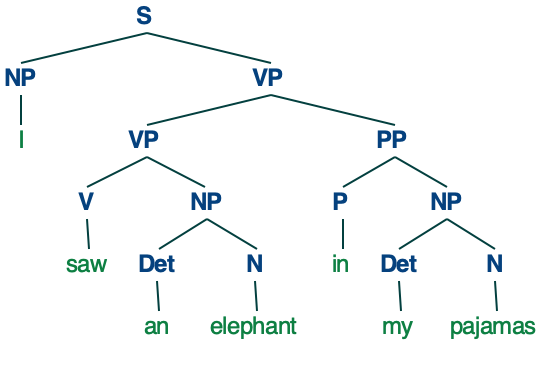

In [ ]:
Image(mypath + 'image2.png')

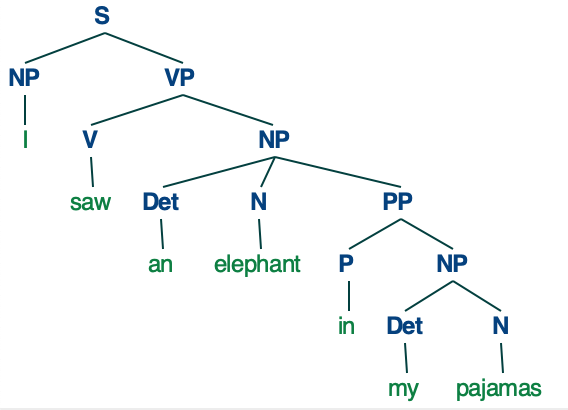

In [ ]:
Image(mypath + 'image3.png')

Results for the `ViterbiParser`:

In [ ]:
print("Sentence 1")
for tree in viterbi_parser.parse(tokens1):
    print(tree)
    tree.draw() # To draw the parse with the NLTK GUI

Sentence 1
(S (NP I) (VP (V saw) (NP (Det an) (N elephant)))) (p=0.02)


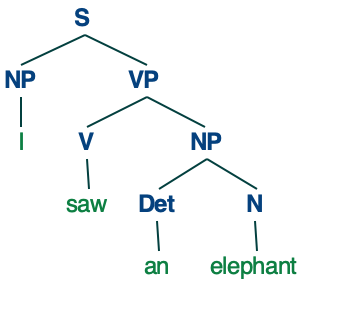

In [ ]:
Image(mypath + 'image4.png')

In [ ]:
print("Sentence 2")
for tree in viterbi_parser.parse(tokens2):
    print(tree)
    tree.draw() # To draw the parse with the NLTK GUI

Sentence 2
(S
  (NP I)
  (VP
    (V saw)
    (NP
      (Det an)
      (N elephant)
      (PP (P in) (NP (Det my) (N pajamas)))))) (p=0.001)


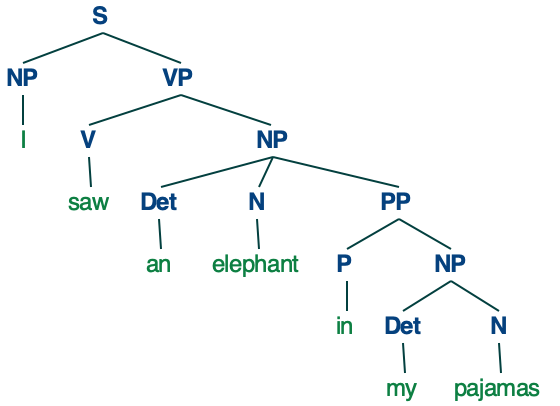

In [ ]:
Image(mypath + 'image5.png')

We can notice that for the first sentence, the two the parsers agree on the result. This is due to the more simple structure of the sentence. 

For the second sentence, the `ChartParser` finds two parse trees, while the `Viterbi` parser outputs only one result. This occurs because the `Viterbi` parser only computes the most probable parse of the sentences, while the `ChartParser` is not concerned with the probabilities and it searches for all parse possibilities. In this case, we can notice that the most probable parse for the second sentence is the second parse produced by the Chart parser.


# Exercise 1

You are given  the following sentences:

    Alice wondered with Bob in the empty city streets
    Bob offered Alice an iguana for her birthday
    Alice gave an inspiring speech at the conference on education


**1. Design a non-probabilistic context-free grammar for parsing these sentences and then manually provide the parse tree(s) for these sentences. Here is a list of lexical rules and syntactic categories that you could use to devise the grammar:**
    
        Lexical rules:

        V    -> 'wondered' | 'offered' | 'gave'
        NP   -> 'Alice' | 'Bob'
        N    -> 'city' | 'streets' | 'iguana' | 'birthday' | 'speech' | 'conference' | 'education'
        Adj  -> 'empty' | 'inspiring'
        Det  -> 'the' | 'an' | 'her'
        Prep -> 'with' | 'in' | 'for' | 'at' | 'on'
        Suggested syntactic categories (non-terminals):

        S - Sentence 
        NP - Noun Phrase 
        VP - Verb Phrase 
        PNP - Prepositional Noun Phrase

In [ ]:
grammar = nltk.CFG.fromstring("""
S    -> NP VP
VP   -> V PNP | V NP | V NP NP PNP | V NP PNP
V    -> 'wondered' | 'offered' | 'gave'
NP   -> 'Alice' | 'Bob' | Det Adj N N | Det Adj N | Det N
PNP  -> Prep NP PNP | Prep NP | Prep N
N    -> 'city' | 'streets' | 'iguana' | 'birthday' | 'speech' | 'conference' | 'education'
Adj  -> 'empty' | 'inspiring'
Det  -> 'the' | 'an' | 'her'
Prep -> 'with' | 'in' | 'for' | 'at' | 'on'
""")

Does it make sense to include

        NP -> ... | Det N PNP

as part of the `grammar`? It leads to more tree options without changing the meaning of the sentence.

From Angel's solution, the following grammar definitions differ:

        VP -> V NP | VP NP PNP | VP PNP | V
        
        NP -> Det N | Det N PNP | Det NP | Adj N | Adj NP | N N
        NP -> 'Alice' | 'Bob'
        
        PNP -> Prep NP | Prep N

**2. With the grammar you designed in point (1.), parse the above sentences using NLTK’s Chart parser, described in Section 1.**


In [ ]:
str_sentence1 = "Alice wondered with Bob in the empty city streets"
str_sentence2 = "Bob offered Alice an iguana for her birthday"
str_sentence3 = "Alice gave an inspiring speech at the conference on education"

In [ ]:
tokens1 = nltk.word_tokenize(str_sentence1)
tokens2 = nltk.word_tokenize(str_sentence2)
tokens3 = nltk.word_tokenize(str_sentence3)

In [ ]:
chart_parser = nltk.ChartParser(grammar)

In [ ]:
for tree in chart_parser.parse(tokens1):
    print(tree)

(S
  (NP Alice)
  (VP
    (V wondered)
    (PNP
      (Prep with)
      (NP Bob)
      (PNP (Prep in) (NP (Det the) (Adj empty) (N city) (N streets))))))


In [ ]:
for tree in chart_parser.parse(tokens2):
    print(tree)

(S
  (NP Bob)
  (VP
    (V offered)
    (NP Alice)
    (NP (Det an) (N iguana))
    (PNP (Prep for) (NP (Det her) (N birthday)))))


In [ ]:
for tree in chart_parser.parse(tokens3):
    print(tree)

(S
  (NP Alice)
  (VP
    (V gave)
    (NP (Det an) (Adj inspiring) (N speech))
    (PNP
      (Prep at)
      (NP (Det the) (N conference))
      (PNP (Prep on) (N education)))))


**3. Display and compare the parse trees obtained in points (1.) and (2.).**

In [ ]:
for tree in chart_parser.parse(tokens1):
    tree.draw()

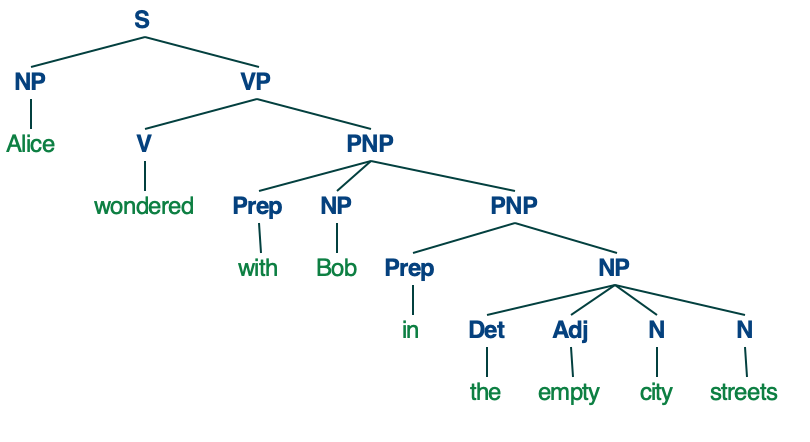

In [ ]:
Image(mypath + 'image6.png')

In [ ]:
for tree in chart_parser.parse(tokens2):
    tree.draw()

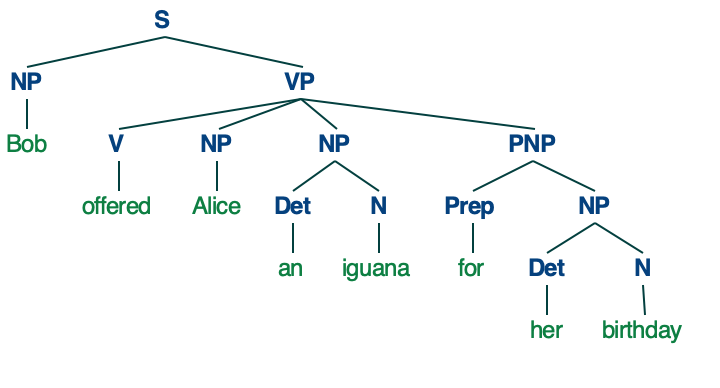

In [ ]:
Image(mypath + 'image7.png')

In [ ]:
for tree in chart_parser.parse(tokens3):
    tree.draw()

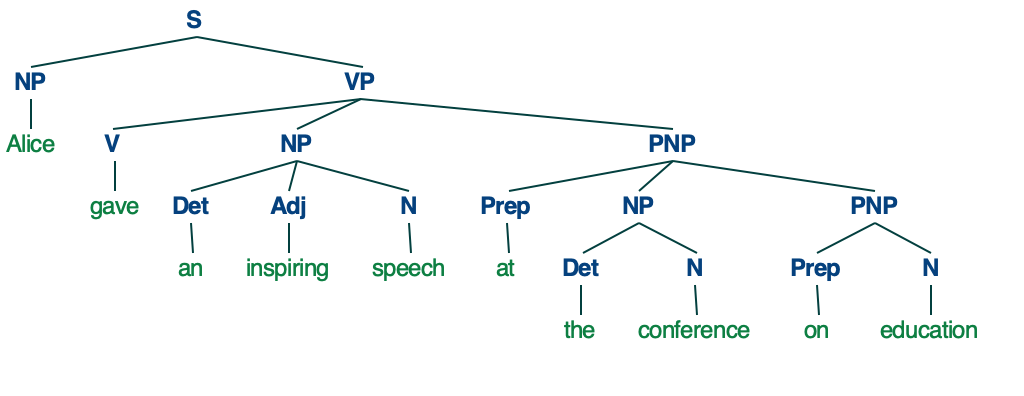

In [ ]:
Image(mypath + 'image8.png')

# Exercise 2: Extracting a Grammar from a Corpus

We have designed very simple grammars in the previous exercises. Even for these very small examples, designing grammars are time consuming and does not necessarily have the best results. 

In this exericse, we explore a different approach to creating grammars: **automatic extraction from annotated texts**.

We start from an annotated text: the `Treebank corpus` from the NLTK framework, which includes a small subset (5% fragment) of the `Penn Treebank Corpus`. It contains data from `Wall Street Journal` for 1650 sentences:

    ( (S
        (NP-SBJ
          (NP (NNP Pierre) (NNP Vinken) )
          (, ,)
          (ADJP
            (NP (CD 61) (NNS years) )
            (JJ old) )
          (, ,) )
        (VP (MD will)
          (VP (VB join)
            (NP (DT the) (NN board) )
            (PP-CLR (IN as)
              (NP (DT a) (JJ nonexecutive) (NN director) ))
            (NP-TMP (NNP Nov.) (CD 29) )))
        (. .) ))
        
     
The goal is to automatically extract the CFG out of the treebank and then to evaluate and improve the extracted grammar. 

**1. First, split the corpus into two parts : one for learning the grammar (training set) and one for evaluating it (test set). For the sake of saving time during this practical session, use 3% of the total number of sentences for the test set. Here is how you could make the split.**

In [ ]:
treebank = nltk.corpus.treebank    
dataset_size = len(treebank.parsed_sents())

In [ ]:
split_size = int(dataset_size * 0.97)

learning_set = treebank.parsed_sents()[:split_size]
test_set = treebank.parsed_sents()[split_size:]

Note that `test_set`  already contains the parses of the sentences. This is what we are going to compare against, in order to assess the quality of the extracted grammar. In addition, we need the raw (not parsed)  format of the sentences in the test set. These raw sentences will be parsed with the extracted grammar and then compared against the reference, stored in `test_set`.

In [ ]:
sents = treebank.sents()
raw_test_set = [ [ w for w in sents[i] ] for i in range(split_size, dataset_size) ]

Note that `raw_test_set` is a list of lists.

**Extract the grammar out of the learning corpus** At this point, it might be useful to have another look at the commands provided in the end of the document. Here is a suggestion on how to do it. Note that we still need the entire lexicon (i.e. rules of the type POS tag -> word) even though the syntactic rules are extracted from only a portion of the treebank. Assume that you have already separated the learning set from the test set and that the learning set is stored in the `learning_set` variable.

In [ ]:
print(learning_set[0].productions())

[S -> NP-SBJ VP ., NP-SBJ -> NP , ADJP ,, NP -> NNP NNP, NNP -> 'Pierre', NNP -> 'Vinken', , -> ',', ADJP -> NP JJ, NP -> CD NNS, CD -> '61', NNS -> 'years', JJ -> 'old', , -> ',', VP -> MD VP, MD -> 'will', VP -> VB NP PP-CLR NP-TMP, VB -> 'join', NP -> DT NN, DT -> 'the', NN -> 'board', PP-CLR -> IN NP, IN -> 'as', NP -> DT JJ NN, DT -> 'a', JJ -> 'nonexecutive', NN -> 'director', NP-TMP -> NNP CD, NNP -> 'Nov.', CD -> '29', . -> '.']


In [ ]:
treebank.tagged_words()

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]

This is where we will store all of the productions necessary to construct the PCFG:

In [ ]:
tbank_productions = []

For all of the (parsed) sentences in the learning set, extract the `productions` (i.e. extract the rules):

In [ ]:
for sent in learning_set:
    for production in sent.productions():
        tbank_productions.append(production)

In [ ]:
len(tbank_productions)

173810

Now, we will add the lexical rules for the **entire** lexicon:

In [ ]:
for word, tag in treebank.tagged_words():

    # for each tagged word, we create a tree containing that lexical rule,
    # in order to be able to add it to our production set tbank_productions.

    t = Tree.fromstring("("+ tag + " " + word  +")")
    for production in t.productions():
        tbank_productions.append(production)

In [ ]:
len(tbank_productions)

274486

At this point, we have the syntactic rules extracted from the learning set and all of the lexical rules. We are ready to extract the PCFG:

In [ ]:
from nltk.grammar import Nonterminal

tbank_grammar = nltk.grammar.induce_pcfg(Nonterminal('S'), tbank_productions)

Try to have a look at the grammar. How many rules are there? Imagine you would have to correct it, for instance. You certainly will come to the conclusion that this is not feasible. Indeed, in such a framework (automated extraction) the grammars should not  be modified by hand (maybe not even read), but only the corpus has to be changed/corrected/extended.

In [ ]:
tbank_grammar

<Grammar with 21643 productions>

In [ ]:
print(tbank_grammar)

Grammar with 21643 productions (start state = S)
    S -> NP-SBJ VP . [0.161156]
    NP-SBJ -> NP , ADJP , [0.000404913]
    NP -> NNP NNP [0.0312283]
    NNP -> 'Pierre' [0.000107788]
    NNP -> 'Vinken' [0.000215575]
    , -> ',' [0.999793]
    ADJP -> NP JJ [0.0150602]
    NP -> CD NNS [0.0108299]
    CD -> '61' [0.00129032]
    NNS -> 'years' [0.0189964]
    JJ -> 'old' [0.00417573]
    VP -> MD VP [0.0529232]
    MD -> 'will' [0.304419]
    VP -> VB NP PP-CLR NP-TMP [0.000142076]
    VB -> 'join' [0.00158825]
    NP -> DT NN [0.0850731]
    DT -> 'the' [0.494578]
    NN -> 'board' [0.00228222]
    PP-CLR -> IN NP [0.682313]
    IN -> 'as' [0.0337995]
    NP -> DT JJ NN [0.0309673]
    DT -> 'a' [0.229341]
    JJ -> 'nonexecutive' [0.000869943]
    NN -> 'director' [0.00243695]
    NP-TMP -> NNP CD [0.045977]
    NNP -> 'Nov.' [0.00247912]
    CD -> '29' [0.00143369]
    . -> '.' [0.987944]
    NP-SBJ -> NNP NNP [0.0469699]
    NNP -> 'Mr.' [0.0402048]
    VP -> VBZ NP-PRD [0.01122

**2. Evaluate the performance of the grammars on the test set (the 3% of the sentences from the treebank that you isolated in the beginning of the exercise). What proportion of sentences from the test set have been parsed as in the reference (i.e. are correctly parsed) by the extracted grammar?**

From the created gramar, you create a parser to annotate new sentences:

In [ ]:
parser = nltk.ViterbiParser(tbank_grammar)

In [ ]:
cparser = nltk.ChartParser(tbank_grammar)

Test the extracted grammar with the `ViterbiParser` on one sentence. The `ViterbiParser` gives the most probable parse tree. Test all sentences in the test set and compare them to the reference parsing:

Compare the very first sentence of the test set.

As resulting from the parser:

In [ ]:
for t in parser.parse(raw_test_set[0]):
    print(t)

(S
  (NP-SBJ (NNS Companies))
  (VP
    (VBN listed)
    (NP
      (NP (-NONE- *))
      (PP
        (IN below)
        (NP (VBN reported) (JJ quarterly) (NN profit))))
    (ADVP-PRP
      (RB substantially)
      (JJ different)
      (PP
        (IN from)
        (NP
          (DT the)
          (ADJP
            (JJ average)
            (PP (IN of) (NP (NNS analysts) (POS '))))
          (NNS estimates)))))
  (. .)) (p=1.834e-56)


In [ ]:
parser.parse_all(raw_test_set[0])[0].productions()

[S -> NP-SBJ VP .,
 NP-SBJ -> NNS,
 NNS -> 'Companies',
 VP -> VBN NP ADVP-PRP,
 VBN -> 'listed',
 NP -> NP PP,
 NP -> -NONE-,
 -NONE- -> '*',
 PP -> IN NP,
 IN -> 'below',
 NP -> VBN JJ NN,
 VBN -> 'reported',
 JJ -> 'quarterly',
 NN -> 'profit',
 ADVP-PRP -> RB JJ PP,
 RB -> 'substantially',
 JJ -> 'different',
 PP -> IN NP,
 IN -> 'from',
 NP -> DT ADJP NNS,
 DT -> 'the',
 ADJP -> JJ PP,
 JJ -> 'average',
 PP -> IN NP,
 IN -> 'of',
 NP -> NNS POS,
 NNS -> 'analysts',
 POS -> "'",
 NNS -> 'estimates',
 . -> '.']

As annotated in the test set:

In [ ]:
print(test_set[0])

(S
  (NP-SBJ
    (NP (NNS Companies))
    (VP (VBN listed) (NP (-NONE- *)) (ADVP-LOC (IN below))))
  (VP
    (VBD reported)
    (NP
      (NP (JJ quarterly) (NN profit))
      (ADJP
        (RB substantially)
        (JJ different)
        (PP
          (IN from)
          (NP
            (NP (DT the) (NN average))
            (PP
              (IN of)
              (NP (NP (NNS analysts) (POS ')) (NNS estimates))))))))
  (. .))


In [ ]:
test_set[0].productions()

[S -> NP-SBJ VP .,
 NP-SBJ -> NP VP,
 NP -> NNS,
 NNS -> 'Companies',
 VP -> VBN NP ADVP-LOC,
 VBN -> 'listed',
 NP -> -NONE-,
 -NONE- -> '*',
 ADVP-LOC -> IN,
 IN -> 'below',
 VP -> VBD NP,
 VBD -> 'reported',
 NP -> NP ADJP,
 NP -> JJ NN,
 JJ -> 'quarterly',
 NN -> 'profit',
 ADJP -> RB JJ PP,
 RB -> 'substantially',
 JJ -> 'different',
 PP -> IN NP,
 IN -> 'from',
 NP -> NP PP,
 NP -> DT NN,
 DT -> 'the',
 NN -> 'average',
 PP -> IN NP,
 IN -> 'of',
 NP -> NP NNS,
 NP -> NNS POS,
 NNS -> 'analysts',
 POS -> "'",
 NNS -> 'estimates',
 . -> '.']

Before moving on, let us inspect the tree rendering in more detail. Note that `parser.parse(whatever)` is a generator, so it cannot be sliced unless transformed into a `list`.

Let's exhaust the generator and print the entire parse:

In [ ]:
for tree in parser.parse(raw_test_set[0]):
    print(tree)

(S
  (NP-SBJ (NNS Companies))
  (VP
    (VBN listed)
    (NP
      (NP (-NONE- *))
      (PP
        (IN below)
        (NP (VBN reported) (JJ quarterly) (NN profit))))
    (ADVP-PRP
      (RB substantially)
      (JJ different)
      (PP
        (IN from)
        (NP
          (DT the)
          (ADJP
            (JJ average)
            (PP (IN of) (NP (NNS analysts) (POS '))))
          (NNS estimates)))))
  (. .)) (p=1.834e-56)


Now let's do it stepwise. Exhaust the generator and print the first component only (below is shown that element 0 is the complete tree itself):

In [ ]:
for tree in list(parser.parse(raw_test_set[0]))[0]:
    print(tree)

(NP-SBJ (NNS Companies)) (p=2.41648e-06)
(VP
  (VBN listed)
  (NP
    (NP (-NONE- *))
    (PP
      (IN below)
      (NP (VBN reported) (JJ quarterly) (NN profit))))
  (ADVP-PRP
    (RB substantially)
    (JJ different)
    (PP
      (IN from)
      (NP
        (DT the)
        (ADJP
          (JJ average)
          (PP (IN of) (NP (NNS analysts) (POS '))))
        (NNS estimates))))) (p=4.76693e-50)
(. .) (p=0.987944)


Print the entire tree cast to `list` type:

In [ ]:
for tree in list(parser.parse(raw_test_set[0]))[0]:
    print(list(tree))

[ProbabilisticTree('NNS', ['Companies']) (p=8.405480373203328e-05)]
[ProbabilisticTree('VBN', ['listed']) (p=0.004038964124495129), ProbabilisticTree('NP', [ProbabilisticTree('NP', [ProbabilisticTree('-NONE-', ['*']) (p=0.1468526080591725)]) (p=0.007619831307176095), ProbabilisticTree('PP', [ProbabilisticTree('IN', ['below']) (p=0.003096134991485629), ProbabilisticTree('NP', [ProbabilisticTree('VBN', ['reported']) (p=0.00546448087431694), ProbabilisticTree('JJ', ['quarterly']) (p=0.00078294910830796), ProbabilisticTree('NN', ['profit']) (p=0.0038294909484759398)]) (p=2.1378045416956437e-12)]) (p=5.1727002375843775e-15)]) (p=3.618879735673556e-18), ProbabilisticTree('ADVP-PRP', [ProbabilisticTree('RB', ['substantially']) (p=0.002333931777378815), ProbabilisticTree('JJ', ['different']) (p=0.0033927794693344934), ProbabilisticTree('PP', [ProbabilisticTree('IN', ['from']) (p=0.039011300892718925), ProbabilisticTree('NP', [ProbabilisticTree('DT', ['the']) (p=0.4945780879970086), Probabilist

Exhaust the generator and print the first sub-tree only:

In [ ]:
for tree in list(parser.parse(raw_test_set[0]))[0][0]:
    print(tree)

(NNS Companies) (p=8.40548e-05)


Print the first sub-tree cast to `list` type:

In [ ]:
for tree in list(parser.parse(raw_test_set[0]))[0][0]:
    print(list(tree))

['Companies']


In [ ]:
raw_test_set[0]

['Companies',
 'listed',
 '*',
 'below',
 'reported',
 'quarterly',
 'profit',
 'substantially',
 'different',
 'from',
 'the',
 'average',
 'of',
 'analysts',
 "'",
 'estimates',
 '.']

Extract the equivalent to the first sub-tree from `raw_test_set`:

In [ ]:
raw_test_set[0][0]

'Companies'

Compare as per template's solution:

In [ ]:
for tree in list(parser.parse(raw_test_set[0]))[0][0]:
    print(raw_test_set[0][0] == tree)

False


It does not look like the comparison above is done properly (?)

Rather try the following:

In [ ]:
for tree in list(parser.parse(raw_test_set[0]))[0][0]:
    print([raw_test_set[0][0]])
    print(list(tree))
    print([raw_test_set[0][0]] == list(tree))

['Companies']
['Companies']
True


Now the comparison is proper. However, it is comparing by leaf. I wonder if this is enough, shouldn't it be comparing by `production`?

In [ ]:
for tree in list(parser.parse(raw_test_set[0]))[0][0]:
    print([test_set[0][0][0].productions()[1]])
    print(tree.productions())
    print([test_set[0][0][0].productions()[1]] == tree.productions())

[NNS -> 'Companies']
[NNS -> 'Companies']
True


Exhaust the generator and print the second sub-tree only:

In [ ]:
for tree in list(parser.parse(raw_test_set[0]))[0][1]:
            print(tree)

(VBN listed) (p=0.00403896)
(NP
  (NP (-NONE- *))
  (PP
    (IN below)
    (NP (VBN reported) (JJ quarterly) (NN profit)))) (p=3.61888e-18)
(ADVP-PRP
  (RB substantially)
  (JJ different)
  (PP
    (IN from)
    (NP
      (DT the)
      (ADJP
        (JJ average)
        (PP (IN of) (NP (NNS analysts) (POS '))))
      (NNS estimates)))) (p=4.59097e-26)


Static comparison as per template's solution is not possible at sub-tree level, see below:

In [ ]:
for tree in list(parser.parse(raw_test_set[0]))[0][1]:
    print([raw_test_set[0][1]])
    print(list(tree))
    print([raw_test_set[0][1]] == list(tree))

['listed']
['listed']
True
['listed']
[ProbabilisticTree('NP', [ProbabilisticTree('-NONE-', ['*']) (p=0.1468526080591725)]) (p=0.007619831307176095), ProbabilisticTree('PP', [ProbabilisticTree('IN', ['below']) (p=0.003096134991485629), ProbabilisticTree('NP', [ProbabilisticTree('VBN', ['reported']) (p=0.00546448087431694), ProbabilisticTree('JJ', ['quarterly']) (p=0.00078294910830796), ProbabilisticTree('NN', ['profit']) (p=0.0038294909484759398)]) (p=2.1378045416956437e-12)]) (p=5.1727002375843775e-15)]
False
['listed']
[ProbabilisticTree('RB', ['substantially']) (p=0.002333931777378815), ProbabilisticTree('JJ', ['different']) (p=0.0033927794693344934), ProbabilisticTree('PP', [ProbabilisticTree('IN', ['from']) (p=0.039011300892718925), ProbabilisticTree('NP', [ProbabilisticTree('DT', ['the']) (p=0.4945780879970086), ProbabilisticTree('ADJP', [ProbabilisticTree('JJ', ['average']) (p=0.003827751196172249), ProbabilisticTree('PP', [ProbabilisticTree('IN', ['of']) (p=0.23484183910418494)

Try with `productions` instead:

In [ ]:
for tree in list(parser.parse(raw_test_set[0]))[0][1]:
    print(test_set[0][0][1].productions()[1::2])
    print(tree.productions())
    print(test_set[0][0][1].productions()[1::2] == tree.productions())

[VBN -> 'listed', -NONE- -> '*', IN -> 'below']
[VBN -> 'listed']
False
[VBN -> 'listed', -NONE- -> '*', IN -> 'below']
[NP -> NP PP, NP -> -NONE-, -NONE- -> '*', PP -> IN NP, IN -> 'below', NP -> VBN JJ NN, VBN -> 'reported', JJ -> 'quarterly', NN -> 'profit']
False
[VBN -> 'listed', -NONE- -> '*', IN -> 'below']
[ADVP-PRP -> RB JJ PP, RB -> 'substantially', JJ -> 'different', PP -> IN NP, IN -> 'from', NP -> DT ADJP NNS, DT -> 'the', ADJP -> JJ PP, JJ -> 'average', PP -> IN NP, IN -> 'of', NP -> NNS POS, NNS -> 'analysts', POS -> "'", NNS -> 'estimates']
False


It seems matching the structures at sub-level is involved, not sure it can be done programmatically. Let's rather compare at the global level after exhausting the generator.

First, as per template's solution (the loop below would correspond to the cycle i=1 in the outermost loop):

In [ ]:
for tree in parser.parse(raw_test_set[1]):
    print(tree)
    print(raw_test_set[1][1])
    print(raw_test_set[1][1] == tree)

(S
  (NP-SBJ (DT The) (NNS companies))
  (VP
    (VBP are)
    (VP
      (VP
        (VBN followed)
        (NP (-NONE- *-1))
        (PP
          (IN by)
          (NP
            (QP (IN at) (JJS least) (CD three))
            (NNS analysts))))
      (, ,)
      (CC and)
      (VP
        (VBD had)
        (NP
          (NP
            (DT a)
            (JJ minimum)
            (JJ five-cent)
            (NN change))
          (PP (IN in) (NP (JJ actual) (NNS earnings))))
        (PP-CLR (IN per) (NP (NN share))))))
  (. .)) (p=1.34423e-62)
companies
False


The comparison is not well defined, as suspected. Rather try the following:

In [ ]:
for tree in parser.parse(raw_test_set[1]):
    print(tree.productions())
    print(test_set[1].productions())
    print(test_set[1].productions() == tree.productions())

[S -> NP-SBJ VP ., NP-SBJ -> DT NNS, DT -> 'The', NNS -> 'companies', VP -> VBP VP, VBP -> 'are', VP -> VP , CC VP, VP -> VBN NP PP, VBN -> 'followed', NP -> -NONE-, -NONE- -> '*-1', PP -> IN NP, IN -> 'by', NP -> QP NNS, QP -> IN JJS CD, IN -> 'at', JJS -> 'least', CD -> 'three', NNS -> 'analysts', , -> ',', CC -> 'and', VP -> VBD NP PP-CLR, VBD -> 'had', NP -> NP PP, NP -> DT JJ JJ NN, DT -> 'a', JJ -> 'minimum', JJ -> 'five-cent', NN -> 'change', PP -> IN NP, IN -> 'in', NP -> JJ NNS, JJ -> 'actual', NNS -> 'earnings', PP-CLR -> IN NP, IN -> 'per', NP -> NN, NN -> 'share', . -> '.']
[S -> NP-SBJ-1 VP ., NP-SBJ-1 -> DT NNS, DT -> 'The', NNS -> 'companies', VP -> VP , CC VP, VP -> VBP VP, VBP -> 'are', VP -> VBN NP PP, VBN -> 'followed', NP -> -NONE-, -NONE- -> '*-1', PP -> IN NP-LGS, IN -> 'by', NP-LGS -> ADVP CD NNS, ADVP -> IN JJS, IN -> 'at', JJS -> 'least', CD -> 'three', NNS -> 'analysts', , -> ',', CC -> 'and', VP -> VBD NP, VBD -> 'had', NP -> NP PP, NP -> DT JJ JJ NN, DT -> '

Hm, sometimes the `productions` are in both lists but not in the same order, which is tricky. Perhaps it is more convenient to just compare the trees as such (no casting to `list`): 

In [ ]:
for tree in parser.parse(raw_test_set[1]):
    print(tree)
    print(test_set[1])
    print(test_set[1] == tree)

(S
  (NP-SBJ (DT The) (NNS companies))
  (VP
    (VBP are)
    (VP
      (VP
        (VBN followed)
        (NP (-NONE- *-1))
        (PP
          (IN by)
          (NP
            (QP (IN at) (JJS least) (CD three))
            (NNS analysts))))
      (, ,)
      (CC and)
      (VP
        (VBD had)
        (NP
          (NP
            (DT a)
            (JJ minimum)
            (JJ five-cent)
            (NN change))
          (PP (IN in) (NP (JJ actual) (NNS earnings))))
        (PP-CLR (IN per) (NP (NN share))))))
  (. .)) (p=1.34423e-62)
(S
  (NP-SBJ-1 (DT The) (NNS companies))
  (VP
    (VP
      (VBP are)
      (VP
        (VBN followed)
        (NP (-NONE- *-1))
        (PP
          (IN by)
          (NP-LGS
            (ADVP (IN at) (JJS least))
            (CD three)
            (NNS analysts)))))
    (, ,)
    (CC and)
    (VP
      (VBD had)
      (NP
        (NP (DT a) (JJ minimum) (JJ five-cent) (NN change))
        (PP
          (IN in)
          (NP
            (NP (

This display is more intuitive, and it shows that the first and third sub-trees do coincide, but not so the second where the hierarchy of Verb Phrases `VP` differs slightly.

For completion, exhaust the generator and print the third sub-tree only:

In [ ]:
for tree in list(parser.parse(raw_test_set[0]))[0][2]:
    print(tree)

.


In the template solution, the loop is defined as follows:

        parse_success = 0
        for i in range(0, len(raw_test_set)):
            print("==== Parsing sentence " + str(i))
            test_sent = raw_test_set[i]
    
            tbank_grammar.check_coverage(test_sent)
            
            print(test_sent)
            print("[" + str(i) + "] Reference parse:")
            print(test_set[i])
            print("[" + str(i) + "] Parse trees:")
            for tree in parser.parse(test_sent):
                print(tree)
                print(test_sent[i] == tree)
                if test_sent[i] == tree:
                    ++parse_success
                print(parse_success)
        
        print("Successfully parsed sentences: " + str(parse_success) + " out of " + str(len(test_set)))

The innermost loop above does not render a consistent comparison!

Thus, finally, define the evaluation loop where *accuracy* is measured in terms of proportion of matching trees (between the reference and the results of the parser).

Applying the `ViterbiParser` looping over the entire test set seems costly. Rather than checking the matching of all 118 pairs of trees, consider a subset of a few test sentences just to check the execution of the loop below:

In [ ]:
correct_parse = 0

for i in range(0,13,3):
    print("Parsing sentence " + str(i+1) + "...")
    test_sent = raw_test_set[i]
    
    # check_coverage() will raise an exception if the tokens in the test sentence are not covered by the grammar!
    tbank_grammar.check_coverage(test_sent)
    
    for tree in parser.parse(test_sent):
        print(tree)
        print(test_set[i])
        print("\tParse check passed:", test_set[i] == tree)
        if test_set[i] == tree: correct_parse += 1
    print()
    
print("Proportion of correct parses: {}%".format(round(correct_parse/(i+1)*100,2)))

Parsing sentence 1...
(S
  (NP-SBJ (NNS Companies))
  (VP
    (VBN listed)
    (NP
      (NP (-NONE- *))
      (PP
        (IN below)
        (NP (VBN reported) (JJ quarterly) (NN profit))))
    (ADVP-PRP
      (RB substantially)
      (JJ different)
      (PP
        (IN from)
        (NP
          (DT the)
          (ADJP
            (JJ average)
            (PP (IN of) (NP (NNS analysts) (POS '))))
          (NNS estimates)))))
  (. .)) (p=1.834e-56)
(S
  (NP-SBJ
    (NP (NNS Companies))
    (VP (VBN listed) (NP (-NONE- *)) (ADVP-LOC (IN below))))
  (VP
    (VBD reported)
    (NP
      (NP (JJ quarterly) (NN profit))
      (ADJP
        (RB substantially)
        (JJ different)
        (PP
          (IN from)
          (NP
            (NP (DT the) (NN average))
            (PP
              (IN of)
              (NP (NP (NNS analysts) (POS ')) (NNS estimates))))))))
  (. .))
	Parse check passed: False

Parsing sentence 4...
(S
  (NP-SBJ (DT The) (NN percent) (NN difference))
  (VP
 

**3. We now want to study the size of the grammar with respect to the size of the learning set. Split the former learning set (i.e. the 95%  of the treebank) into two parts: one kept for actual learning and another part which is not used. Do this for several percentages of the learning set (10%, 50%, 70%, 80%, 90%, 100%), several times for each ratio. Have a look at the resulting grammars and try to understand their differences.**

In [ ]:
from random import sample 

In [ ]:
entire_lexicon = list()

for word, tag in treebank.tagged_words():
        t = Tree.fromstring("("+ tag + " " + word  +")")
        for production in t.productions():
            entire_lexicon.append(production)

In [ ]:
def split_learning(learning_set, pct, lexicon):
    
    k = int(pct/100 * len(learning_set))
    
    tb_productions = []
    for sent in sample(list(learning_set), k):
        for production in sent.productions():
            tb_productions.append(production)
    
    tb_productions+=lexicon
    
    tb_grammar = nltk.grammar.induce_pcfg(Nonterminal('S'), tb_productions)
    parser = nltk.ViterbiParser(tb_grammar)
    
    return parser

The core of the double loop below is too costly, hence its commenting out:

In [ ]:
for pct in [10, 50, 70, 80, 90, 100]:
    
    for j in range(5):
        
        print("Processing parser number {} from grammar based on {}% of the learning data".format(j+1, pct))
        parser = split_learning(learning_set, pct, entire_lexicon)

        correct_parse = 0

#         for i in range(len(raw_test_set)):
#             print("Parsing sentence " + str(i+1) + "...")
#             test_sent = raw_test_set[i]
    
#             tbank_grammar.check_coverage(test_sent)
    
#             for tree in parser.parse(test_sent):
#                 print(tree)
#                 print(test_set[i])
#                 print("\tParse check passed:", test_set[i] == tree)
#                 if test_set[i] == tree: correct_parse += 1
#             print()
            
#         print("Proportion of correct parses: {}%".format(round(correct_parse/(i+1)*100,2)))
        
        print("pass")

Processing parser number 1 from grammar based on 10% of the learning data
pass
Processing parser number 2 from grammar based on 10% of the learning data
pass
Processing parser number 3 from grammar based on 10% of the learning data
pass
Processing parser number 4 from grammar based on 10% of the learning data
pass
Processing parser number 5 from grammar based on 10% of the learning data
pass
Processing parser number 1 from grammar based on 50% of the learning data
pass
Processing parser number 2 from grammar based on 50% of the learning data
pass
Processing parser number 3 from grammar based on 50% of the learning data
pass
Processing parser number 4 from grammar based on 50% of the learning data
pass
Processing parser number 5 from grammar based on 50% of the learning data
pass
Processing parser number 1 from grammar based on 70% of the learning data
pass
Processing parser number 2 from grammar based on 70% of the learning data
pass
Processing parser number 3 from grammar based on 70%

### Useful NLTK commands

Grammar creation from a given string:

    g = nltk.CFG.fromstring("""<grammar rules here>""")

Tokenize a sentence:

    tokens = nltk.word_tokenize("<sentence>")
    
Create different types of parsers starting from a grammar:

    chart_parser   = nltk.ChartParser(g)
    viterbi_parser = nltk.ViterbiParser(g)

Parse a tokenized text:

    trees = viterbi_parser.parse(tokens) #for example, for the Viterbi parser

Display the parse trees: 

[ If not done yet, you first need to install this library: 
http://tkinter.unpythonic.net/wiki/How_to_install_Tkinter 
]

The command below will generate a popup window, containing the graphical representation of the tree; while the parse tree drawing window is open, your script will be paused. The script will be resumed when you close the window.

    from nltk.tree import *
    from nltk.draw import tree
    tree.draw()

# Additional Materials: Practical Parsing

NLTK provide us a nice way to create our own grammars, as well as to train them based on an annotated dataset.

Nevertheless, as happens with Tagging, most of the times the pre-train modules are enough to solve most of our situation.

My recommendation is to use either [`spacy`](https://spacy.io/) or [`Stanford CoreNLP`](https://stanfordnlp.github.io/CoreNLP/) instead of NLTK for that. The parsers of NLTK are slow and outdated which made them unsuitable for practical situations.

In the following you have an example of usage of Spacy for dependency parsing, applied to a specific tasks

Firstly, you need to load `spacy` with the desired language, English in this case

In [ ]:
import spacy
nlp = spacy.load('en')

Now we can use the spacy object (`nlp`) to perform the desired language annotations to our sentences

In [ ]:
sent = "I shot an elephant"
doc = nlp(sent)

The doc object now contains the text plus all the annotations

In [ ]:
print("Tokens:", [t.text for t in doc])
print("Lemmas:", [t.lemma_ for t in doc])
print("POS Tagging:", [t.pos_ for t in doc])
print("Parsing:", [t.dep_ for t in doc])

Tokens: ['I', 'shot', 'an', 'elephant']
Lemmas: ['-PRON-', 'shoot', 'an', 'elephant']
POS Tagging: ['PRON', 'VERB', 'DET', 'NOUN']
Parsing: ['nsubj', 'ROOT', 'det', 'dobj']


We could use the dependency parsing annotations to identify different parts of the sentences.

In [ ]:
print("Subject:", [tok for tok in doc if (tok.dep_ == "nsubj") ])
print("Verb:", [tok for tok in doc if (tok.dep_ == "ROOT") ])
print("Object:", [tok for tok in doc if ("obj" in tok.dep_ ) ])

Subject: [I]
Verb: [shot]
Object: [elephant]


Let's use it to see what are the objects preferred by Truman in his speech.

In [ ]:
import nltk
from nltk.corpus import state_union
from collections import Counter

text = state_union.raw("1946-Truman.txt")

def detect_most_common_objects(corpus_text, n_verbs = 10):
    verbs = []
    for sentence in nltk.sent_tokenize(corpus_text):
        doc = nlp(sentence)
        for tok in doc:
            if ("obj" in tok.dep_):
                verbs.append(tok.lemma_)
    return Counter(verbs).most_common(n_verbs)

detect_most_common_objects(text, 50)

[('year', 191),
 ('dollar', 155),
 ('-PRON-', 99),
 ('program', 85),
 ('war', 81),
 ('government', 71),
 ('which', 66),
 ('expenditure', 49),
 ('time', 44),
 ('states', 38),
 ('congress', 36),
 ('production', 35),
 ('people', 33),
 ('period', 32),
 ('level', 32),
 ('economy', 31),
 ('service', 30),
 ('policy', 29),
 ('nation', 29),
 ('administration', 27),
 ('month', 27),
 ('price', 27),
 ('force', 26),
 ('legislation', 26),
 ('country', 25),
 ('world', 25),
 ('increase', 25),
 ('budget', 24),
 ('opportunity', 23),
 ('peace', 23),
 ('fund', 23),
 ('act', 23),
 ('appropriation', 23),
 ('business', 22),
 ('income', 22),
 ('responsibility', 21),
 ('purpose', 21),
 ('june', 21),
 ('rate', 21),
 ('system', 20),
 ('department', 19),
 ('future', 19),
 ('power', 19),
 ('end', 19),
 ('development', 19),
 ('september', 19),
 ('activity', 18),
 ('objective', 18),
 ('need', 18),
 ('addition', 18)]